In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay,  make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, mean_absolute_error

In [2]:
df = pd.read_csv('Chronic_Kidney_Dsease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [4]:
df.set_index('PatientID', inplace = True)

In [5]:
df.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [6]:
df.drop(['DoctorInCharge'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, 1 to 1659
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   int64  
 1   Gender                         1659 non-null   int64  
 2   Ethnicity                      1659 non-null   int64  
 3   SocioeconomicStatus            1659 non-null   int64  
 4   EducationLevel                 1659 non-null   int64  
 5   BMI                            1659 non-null   float64
 6   Smoking                        1659 non-null   int64  
 7   AlcoholConsumption             1659 non-null   float64
 8   PhysicalActivity               1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int64  
 12  FamilyHistoryHypertension      1659 non-null   int64 

In [7]:
df['Diagnosis'].value_counts()

Diagnosis
1    1524
0     135
Name: count, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1659.0,54.441230,20.549757,20.000000,36.000000,54.000000,72.000000,90.000000
Gender,1659.0,0.515371,0.499914,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,1659.0,0.713080,1.000430,0.000000,0.000000,0.000000,1.000000,3.000000
SocioeconomicStatus,1659.0,0.977697,0.776686,0.000000,0.000000,1.000000,2.000000,2.000000
EducationLevel,1659.0,1.693189,0.910611,0.000000,1.000000,2.000000,2.000000,3.000000
BMI,1659.0,27.620049,7.288670,15.033888,21.471449,27.652077,34.015849,39.993532
Smoking,1659.0,0.292948,0.455252,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,1659.0,9.969831,5.798787,0.021740,5.051156,9.951503,14.967100,19.992713
PhysicalActivity,1659.0,5.024247,2.866274,0.001186,2.555038,5.072395,7.460563,9.998167
DietQuality,1659.0,5.028544,2.865777,0.002407,2.558443,4.989810,7.428290,9.998927


In [9]:
column_list = df.columns

In [10]:
for col in column_list:
    print(f'{col} Skewness {df[col].skew()}')

Age Skewness 0.0031523709888792374
Gender Skewness -0.061567574143105895
Ethnicity Skewness 1.184191049198264
SocioeconomicStatus Skewness 0.038585422000668744
EducationLevel Skewness -0.22043898173993015
BMI Skewness -0.04188714039290046
Smoking Skewness 0.9107151139842309
AlcoholConsumption Skewness -0.01025806830045158
PhysicalActivity Skewness 0.006964092988368473
DietQuality Skewness 0.02352790664206531
SleepQuality Skewness 0.0522556743652084
FamilyHistoryKidneyDisease Skewness 2.0643785996093107
FamilyHistoryHypertension Skewness 0.8664662322555453
FamilyHistoryDiabetes Skewness 1.1108861101356036
PreviousAcuteKidneyInjury Skewness 2.570967693832
UrinaryTractInfections Skewness 1.422551421842637
SystolicBP Skewness 0.03146498308033247
DiastolicBP Skewness 0.011415610291118714
FastingBloodSugar Skewness 0.08100914676147832
HbA1c Skewness 0.009468700862076296
SerumCreatinine Skewness 0.010360577914047778
BUNLevels Skewness -0.007496932659085163
GFR Skewness 0.015337347144823859
Pr

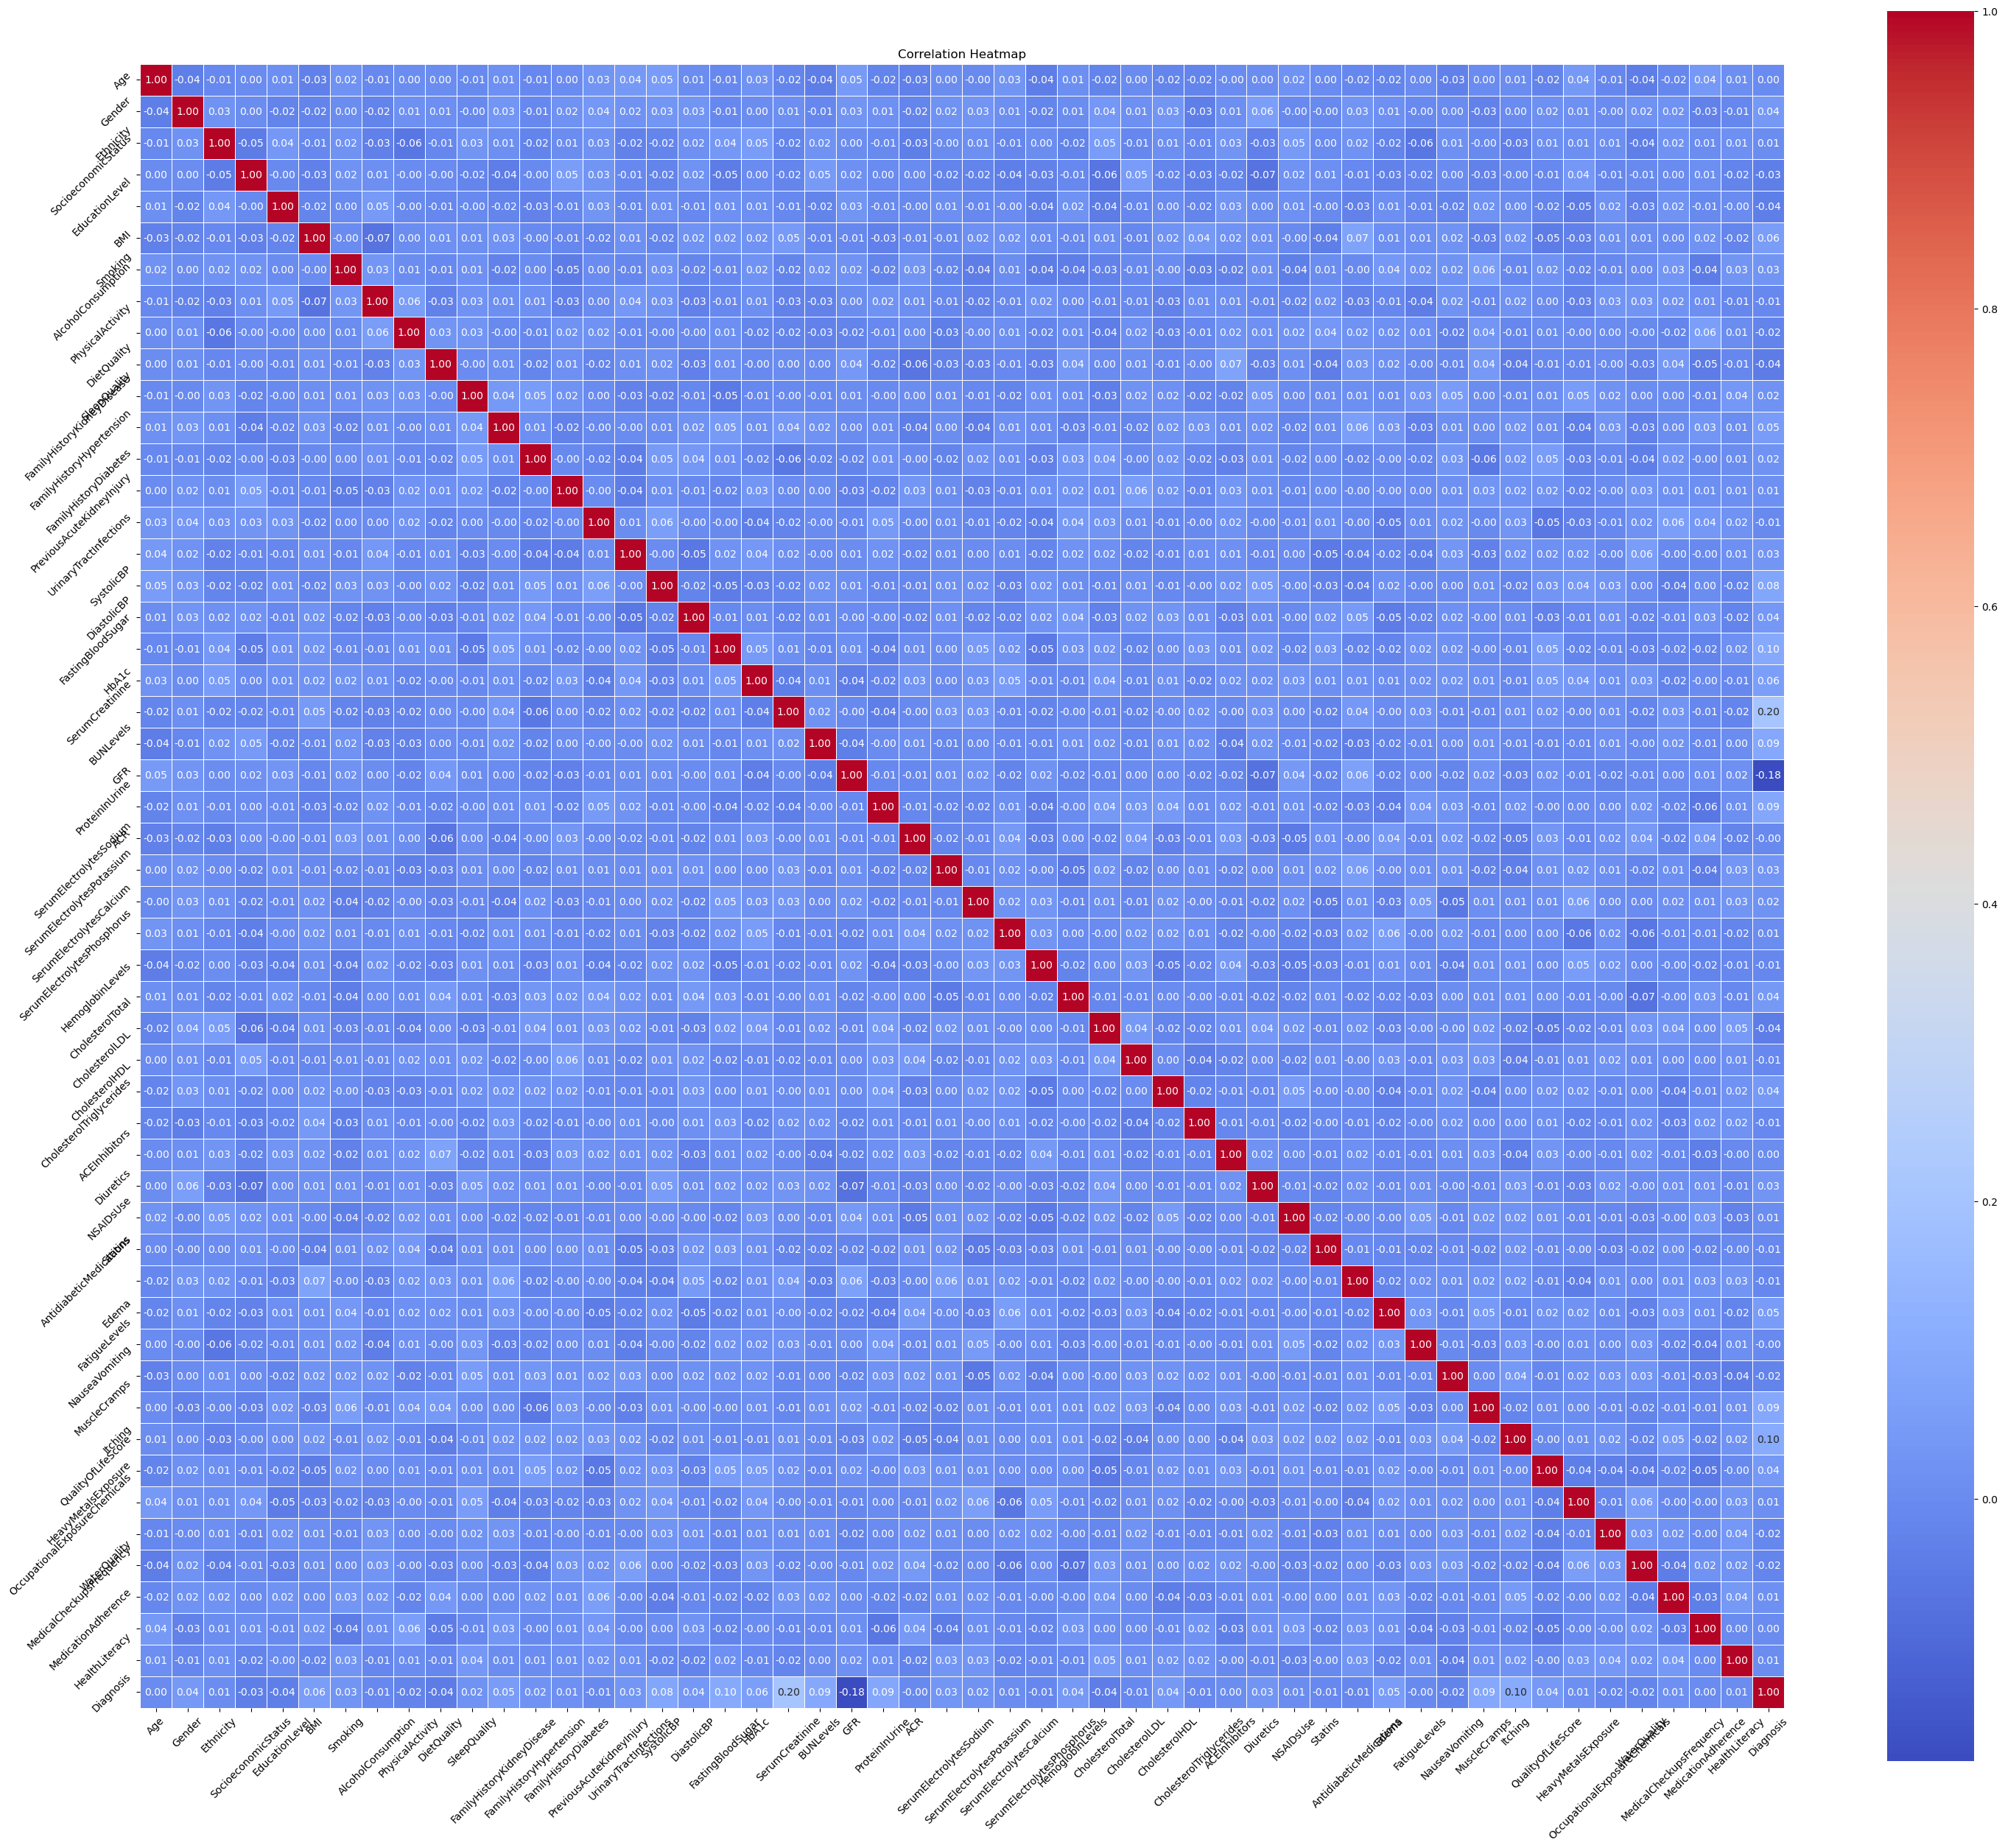

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()


In [12]:
P = df['Diagnosis']
X = df.drop(['Diagnosis'], axis = 1)

## over sampling

<Axes: xlabel='Diagnosis', ylabel='count'>

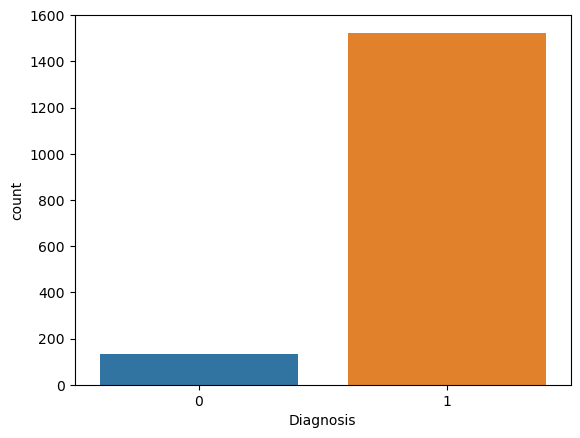

In [13]:
sns.countplot(x = P, data = df)

In [14]:
P.value_counts()

Diagnosis
1    1524
0     135
Name: count, dtype: int64

In [15]:
x_resampled, y_resampled = SMOTE(random_state = 42).fit_resample(X ,P)
print(y_resampled.value_counts())

Diagnosis
1    1524
0    1524
Name: count, dtype: int64


In [16]:
pca = PCA()
pca.fit(x_resampled)

PCA()

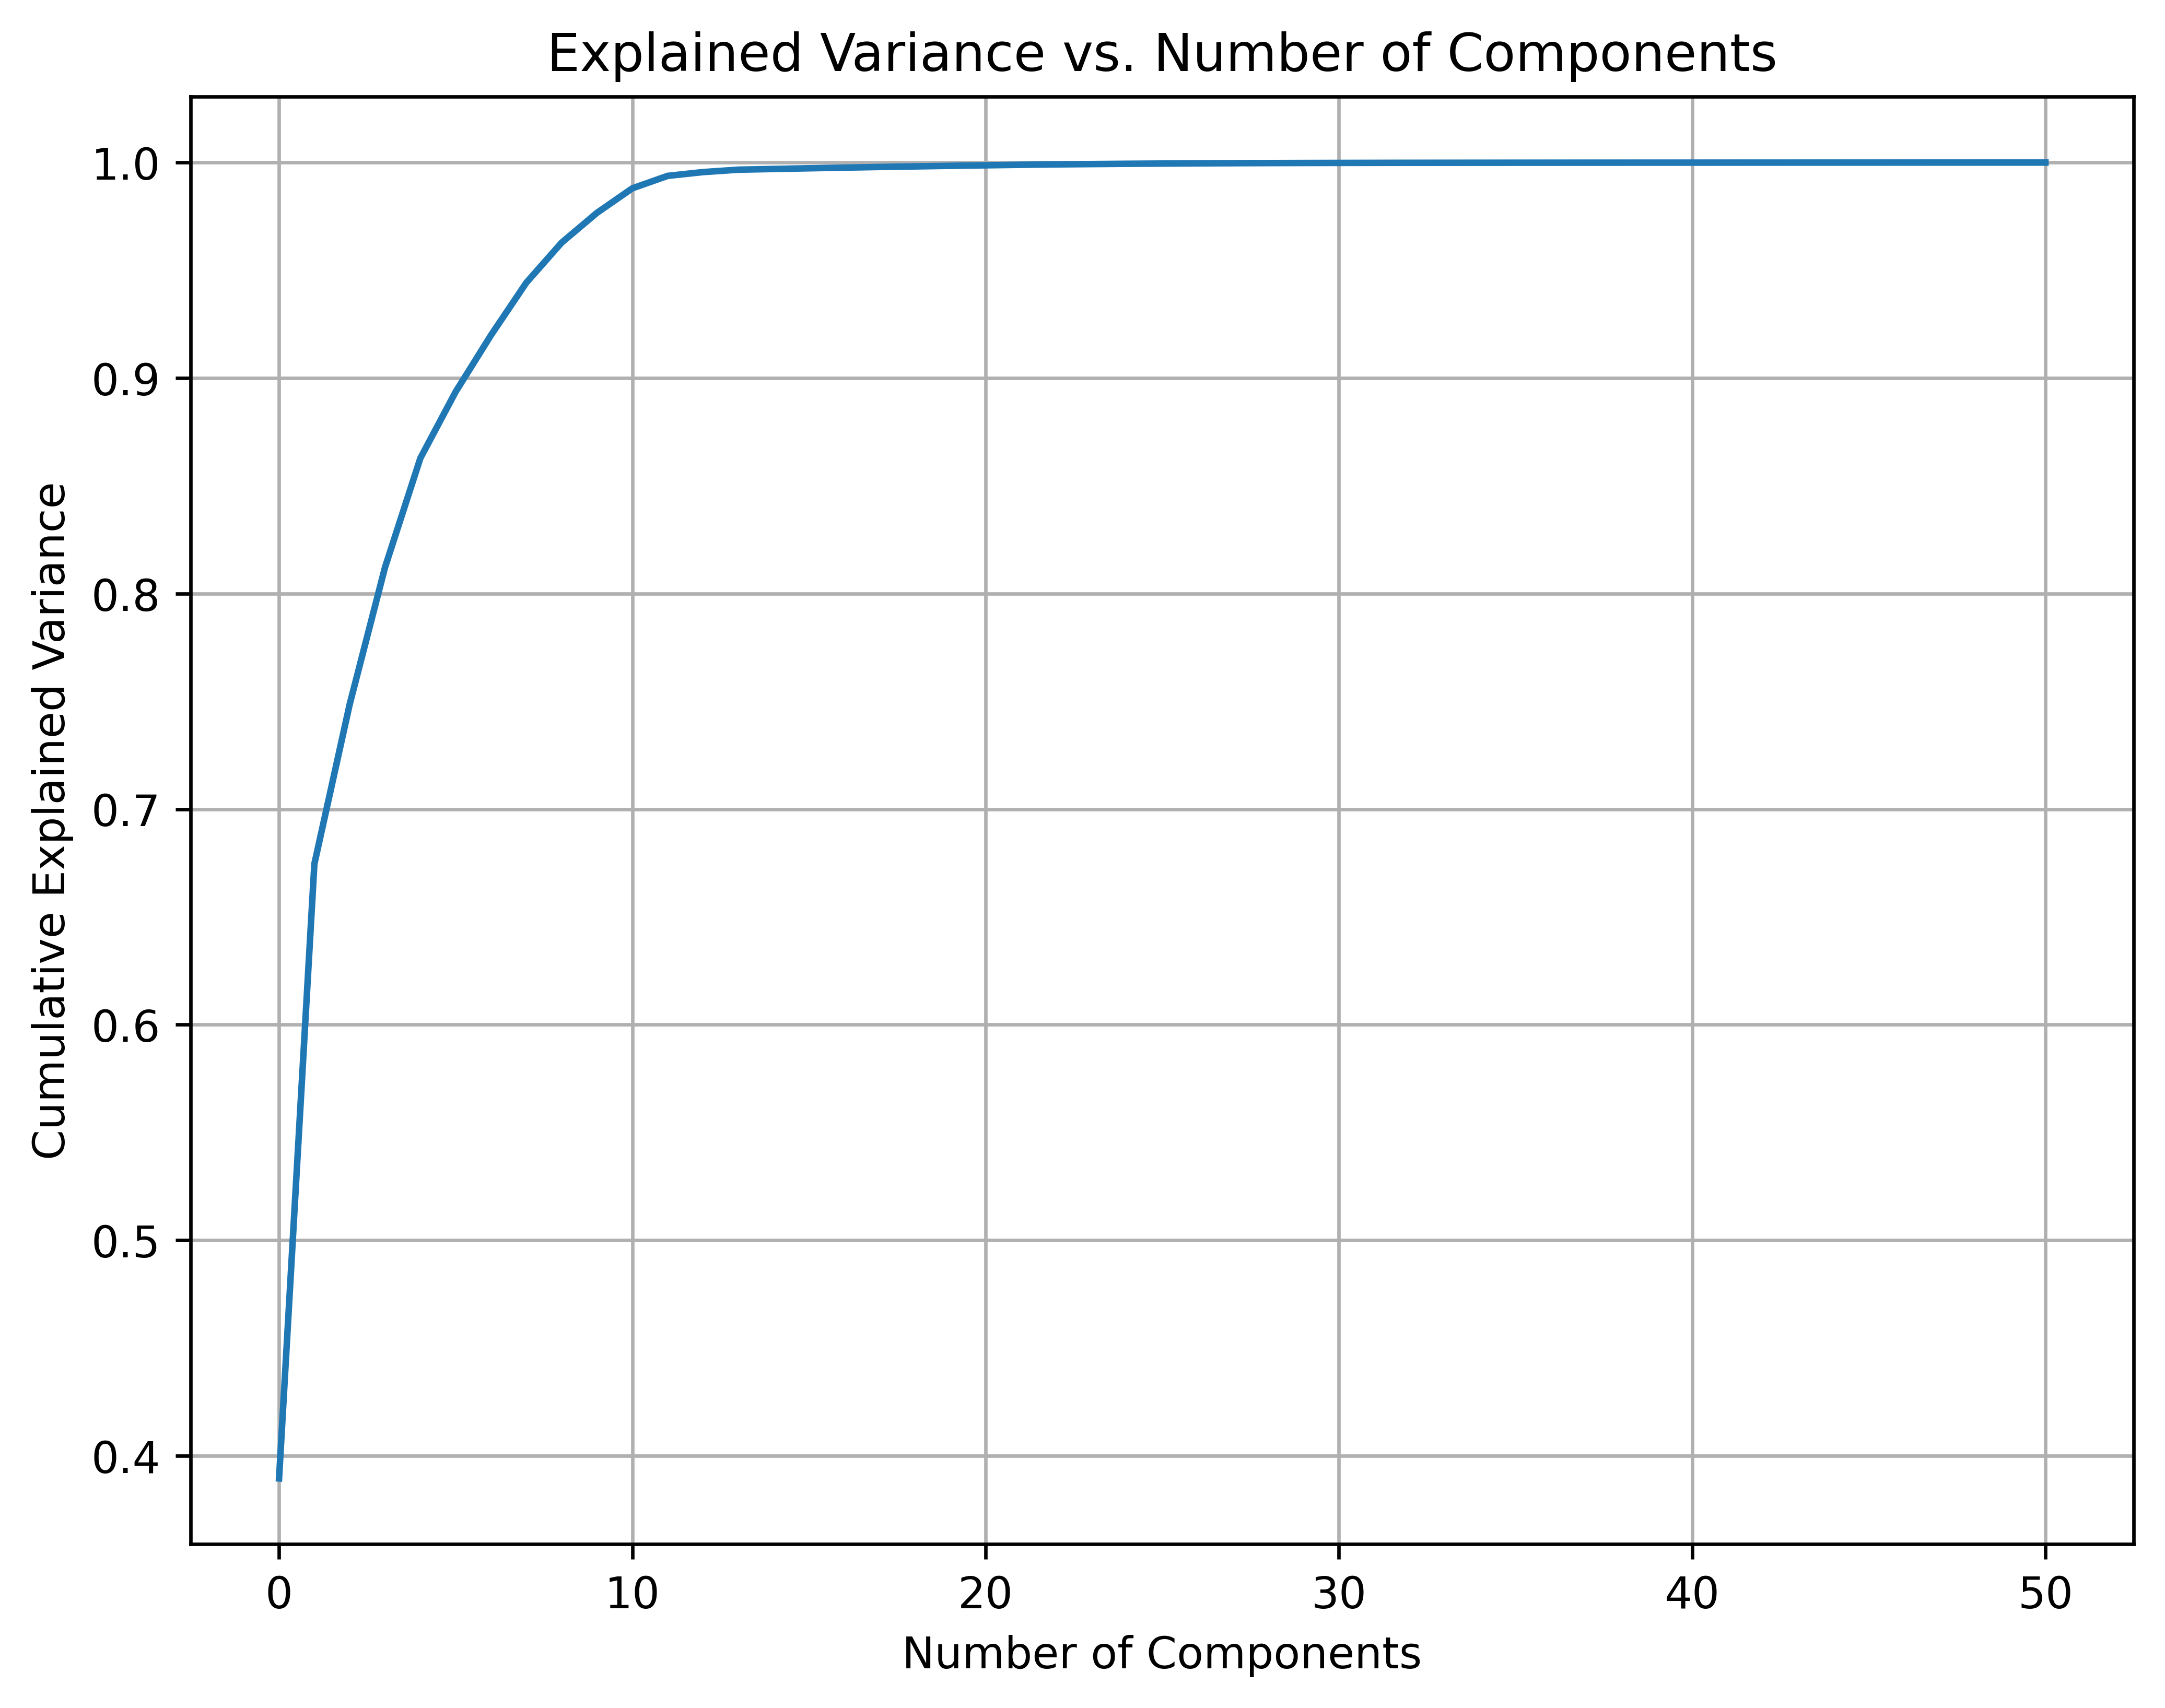

In [17]:
# Plot explained variance ratio
plt.figure(figsize=(8, 6), dpi = 600)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [18]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)
n_components = np.argmax(cumulative_variance >= 0.997) + 1
print(n_components)

[0.38950234 0.67460911 0.74870727 0.81222579 0.86285828 0.8936782
 0.91993129 0.94428761 0.96286776 0.97669168 0.98804913 0.99382616
 0.99558089 0.99669662 0.99702536 0.99734782 0.99765464 0.99795229
 0.99822129 0.99848379 0.99873289 0.99896525 0.99916011 0.99930004
 0.99943516 0.99953553 0.99963055 0.99970692 0.99977054 0.99981342
 0.99984476 0.99987292 0.99989475 0.99990673 0.99991829 0.99992902
 0.99993894 0.99994652 0.99995294 0.99995903 0.9999647  0.99997011
 0.9999752  0.9999797  0.99998409 0.99998803 0.99999182 0.99999453
 0.99999683 0.99999908 1.        ]
15


In [19]:
pca = PCA(n_components = n_components,random_state = 42)

x_resampled = pca.fit_transform(x_resampled)

# Models 

In [20]:
def print_metrics(model):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted'),
        'mae': make_scorer(mean_absolute_error)
        }

    # Evaluate final model using cross-validation
    scores = cross_validate(model, x_resampled, y_resampled, scoring=scoring, n_jobs = -1)
    cross_val_scores = cross_val_score(model, x_resampled, y_resampled, cv=5, scoring = 'accuracy', n_jobs = -1)
    test_res = cross_val_predict(model,x_resampled, y_resampled, n_jobs = -1)

    # Print Cross-validation scores
    print(f"Cross-validation Score: {100*cross_val_scores.mean():.2f}")
    print(f"Cross-validation Accuracy: {100*np.mean(scores['test_accuracy']):.2f}")
    print(f"Cross-validation Precision: {100*np.mean(scores['test_precision']):.2f}")
    print(f"Cross-validation Recall: {100*np.mean(scores['test_recall']):.2f}")
    print(f"Cross-validation F1 Score: {100*np.mean(scores['test_f1']):.2f}")
    print(f"Cross-validation MAE: {100*np.mean(scores['test_mae']):.2f}")

    cf = confusion_matrix(y_resampled,test_res)
    cf_plot = ConfusionMatrixDisplay(cf)

    cf_plot.plot()
    plt.show()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.25)

lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)
res = lr.predict(x_train)
accuracy_score(res, y_train)

0.7449693788276466

Cross-validation Score: 73.33
Cross-validation Accuracy: 73.33
Cross-validation Precision: 73.43
Cross-validation Recall: 73.33
Cross-validation F1 Score: 73.30
Cross-validation MAE: 26.67


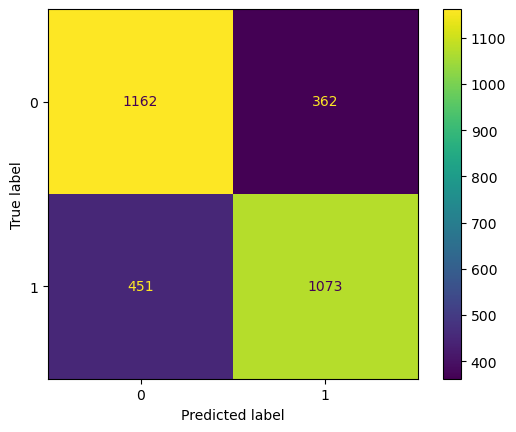

In [22]:
lr = LogisticRegression(max_iter = 1000, random_state = 42)
print_metrics(lr)

Cross-validation Score: 85.27
Cross-validation Accuracy: 85.27
Cross-validation Precision: 85.54
Cross-validation Recall: 85.27
Cross-validation F1 Score: 85.24
Cross-validation MAE: 14.73


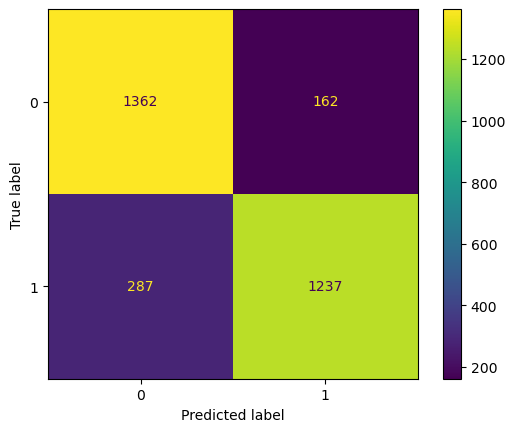

In [23]:
dtc = DecisionTreeClassifier(random_state = 42)
print_metrics(dtc)

Cross-validation Score: 95.80
Cross-validation Accuracy: 95.80
Cross-validation Precision: 95.90
Cross-validation Recall: 95.80
Cross-validation F1 Score: 95.80
Cross-validation MAE: 4.20


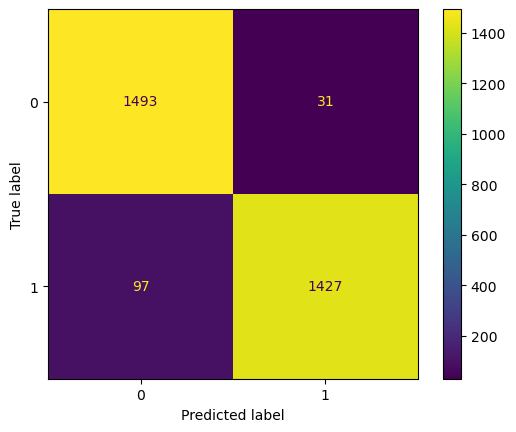

In [24]:
rf = RandomForestClassifier(random_state = 42)
print_metrics(rf)

Cross-validation Score: 82.74
Cross-validation Accuracy: 82.74
Cross-validation Precision: 87.14
Cross-validation Recall: 82.74
Cross-validation F1 Score: 82.21
Cross-validation MAE: 17.26


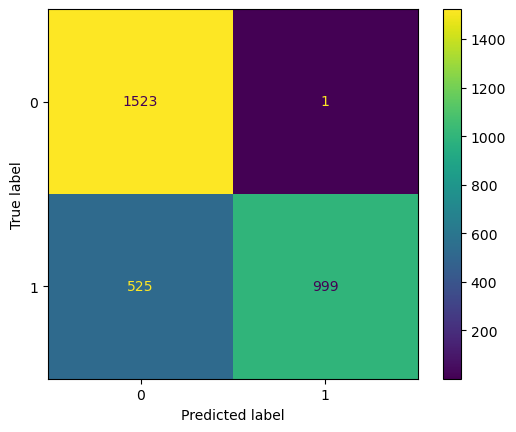

In [25]:
knn = KNeighborsClassifier()
print_metrics(knn)

Cross-validation Score: 94.39
Cross-validation Accuracy: 94.39
Cross-validation Precision: 94.81
Cross-validation Recall: 94.39
Cross-validation F1 Score: 94.38
Cross-validation MAE: 5.61


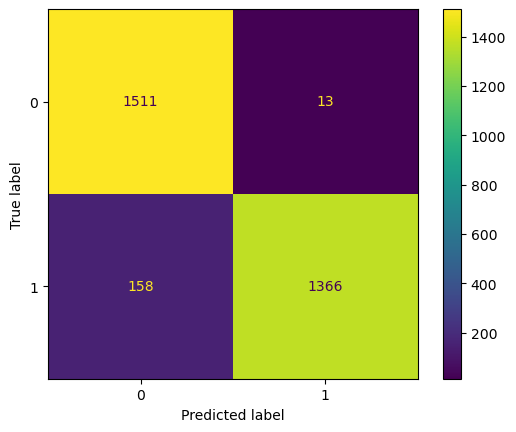

In [26]:
mlp = MLPClassifier(max_iter = 1000, random_state = 42)
print_metrics(mlp)

Cross-validation Score: 79.86
Cross-validation Accuracy: 79.86
Cross-validation Precision: 80.02
Cross-validation Recall: 79.86
Cross-validation F1 Score: 79.83
Cross-validation MAE: 20.14


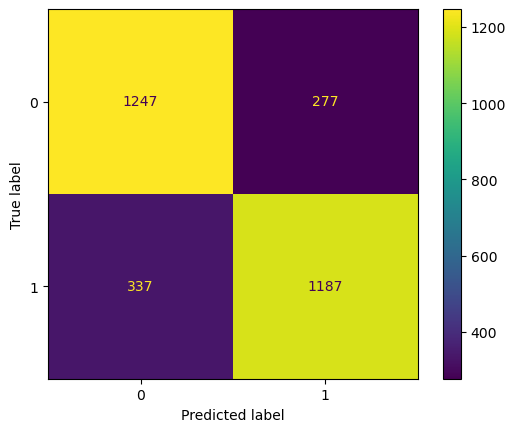

In [27]:
abc = AdaBoostClassifier(random_state = 42)
print_metrics(abc)

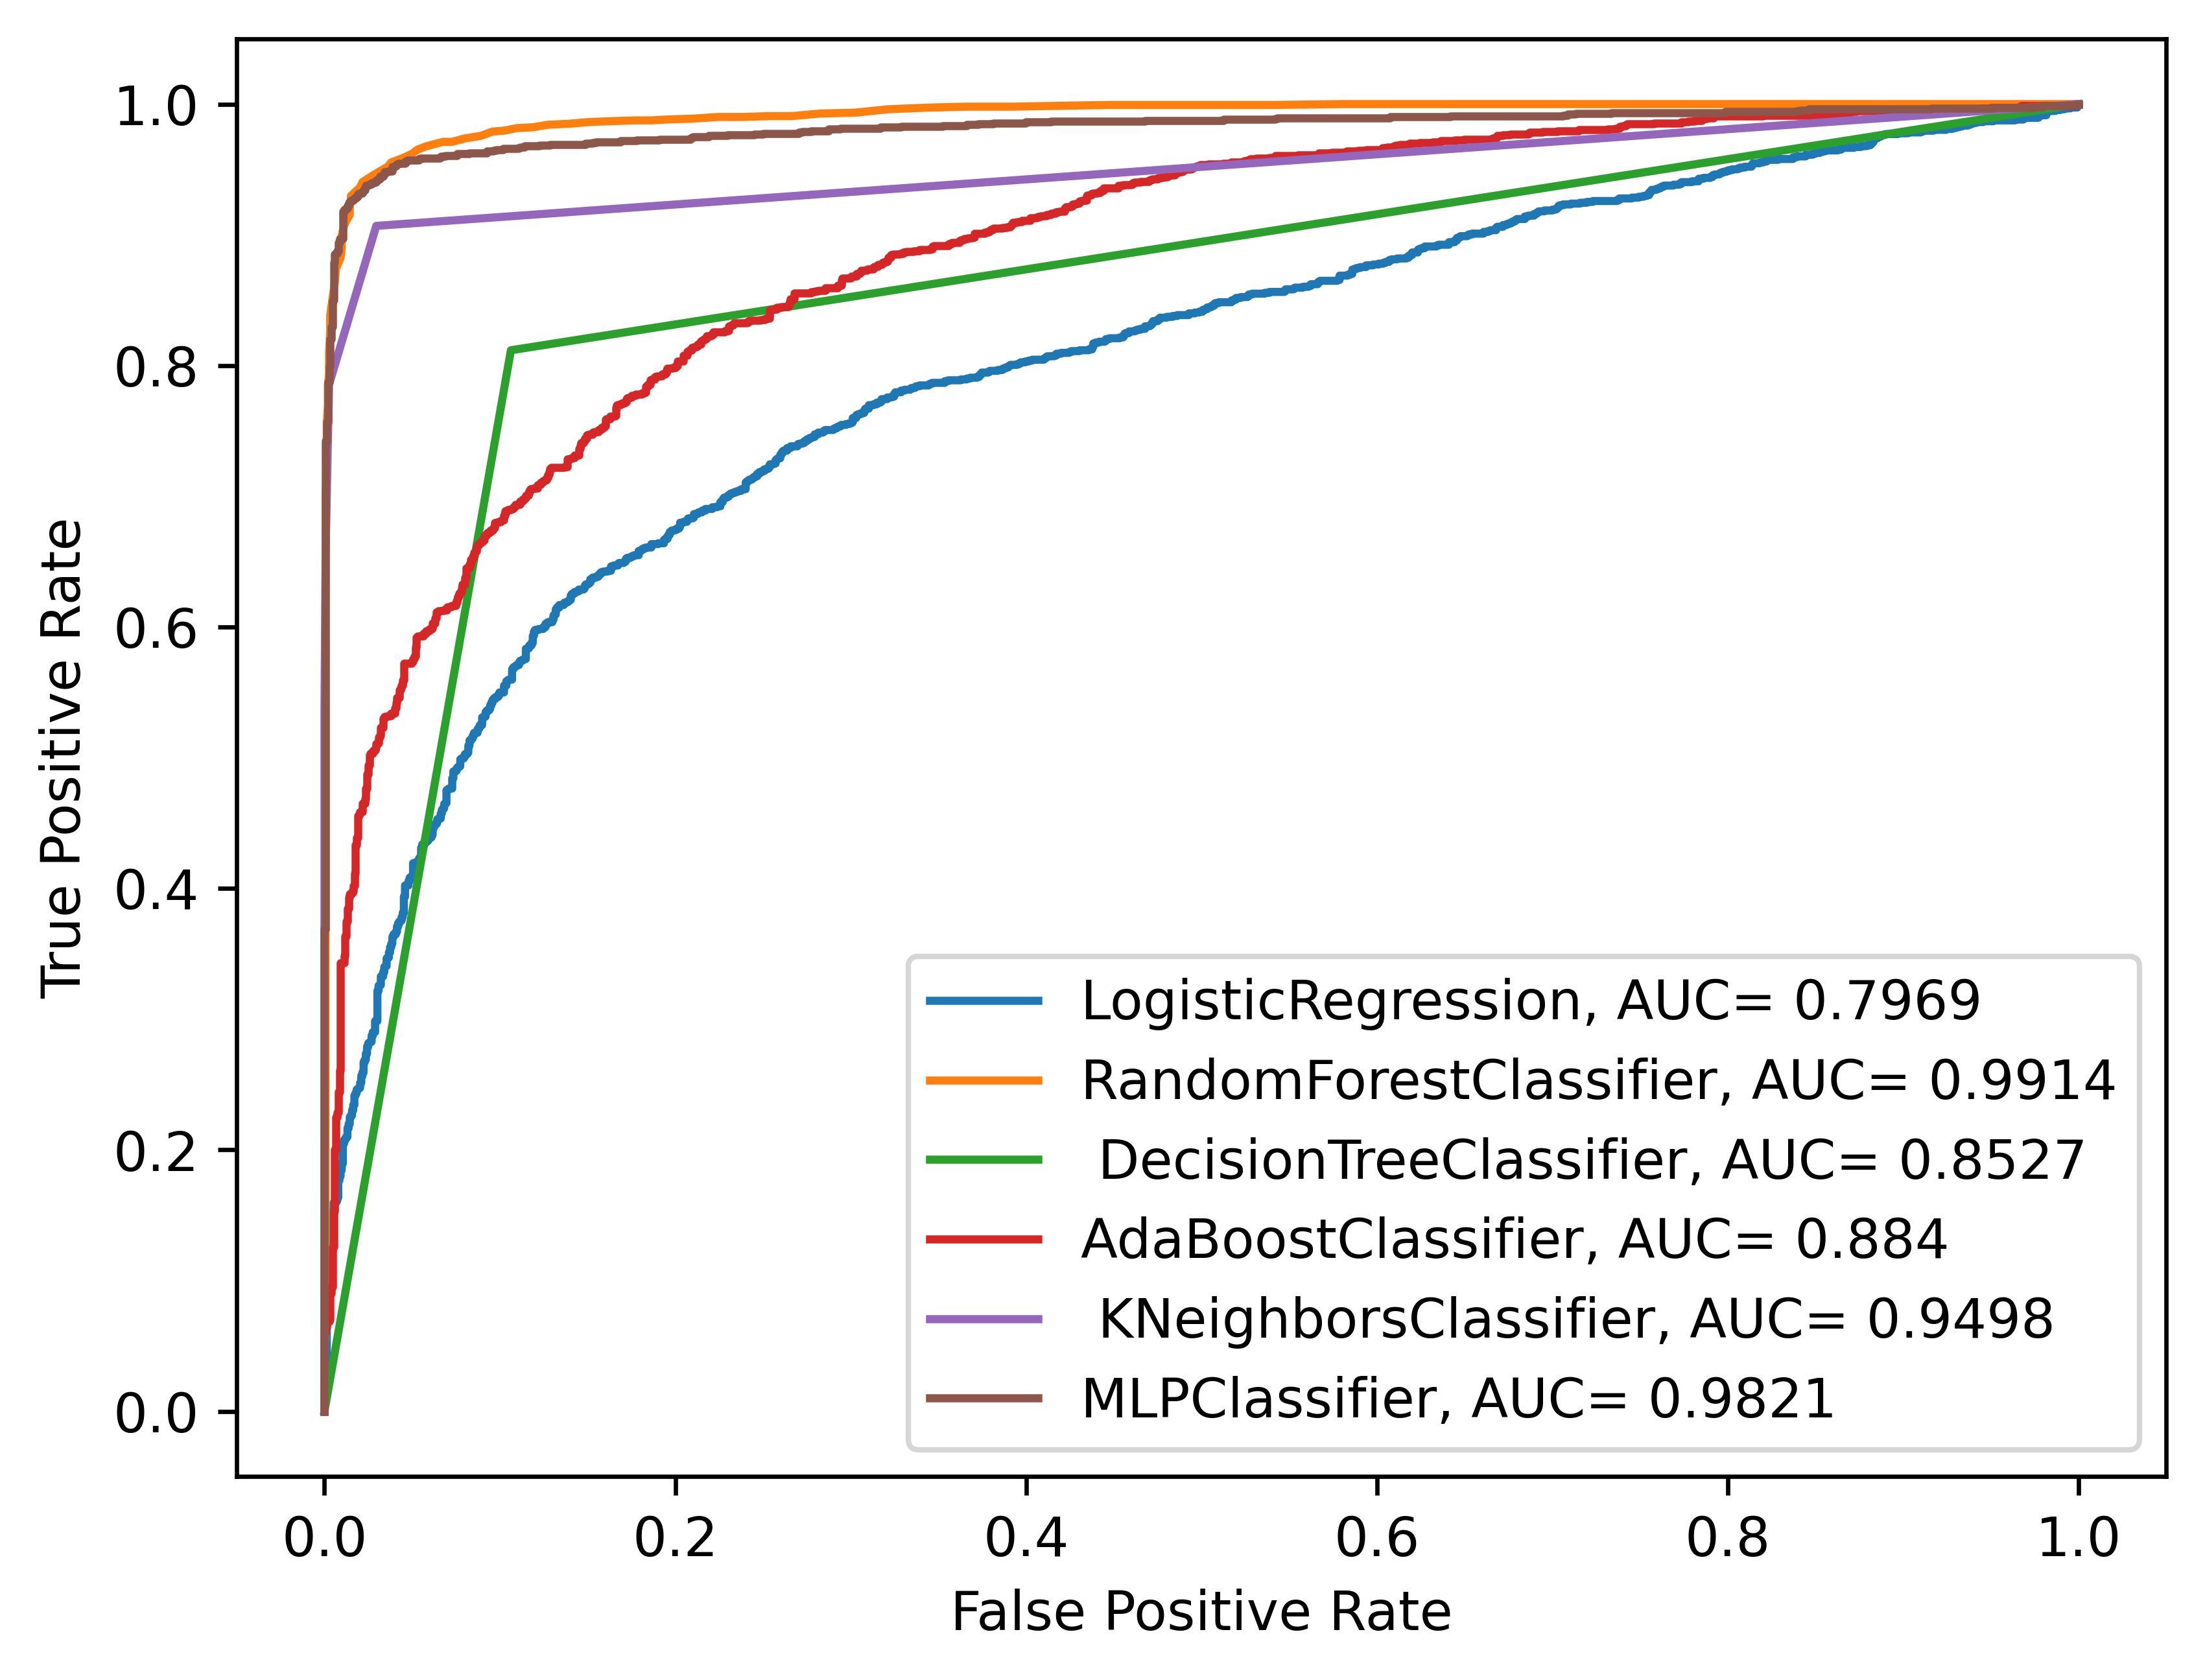

In [28]:
#set up plotting area
figure = plt.figure(0, dpi = 600 ).clf()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#logistic regression model
def plot_roc(model, X, P, label) :
    test_res = cross_val_predict(model, X, P, method='predict_proba', n_jobs = -1)[:,1]
    fpr, tpr, _ = metrics.roc_curve(P, test_res)
    auc = round(metrics.roc_auc_score(P, test_res), 4)
    plt.plot(fpr,tpr,label=f"{label}, AUC= {auc}")

plot_roc(lr, x_resampled, y_resampled, "LogisticRegression")
plot_roc(rf, x_resampled, y_resampled, "RandomForestClassifier")
plot_roc(dtc, x_resampled, y_resampled, " DecisionTreeClassifier")
plot_roc(abc, x_resampled, y_resampled, "AdaBoostClassifier")
plot_roc(knn,x_resampled, y_resampled, " KNeighborsClassifier")
plot_roc(mlp, x_resampled, y_resampled, "MLPClassifier")
plt.legend()

plt.savefig('kidney.png') 

plt.show()